In [51]:
print("Advanced Computer Vision and Video Analytics_Lab3_Harish Sivakumar_E22CSEU0033")

Advanced Computer Vision and Video Analytics_Lab3_Harish Sivakumar_E22CSEU0033


# 1. Read the image
# 2. Display the image

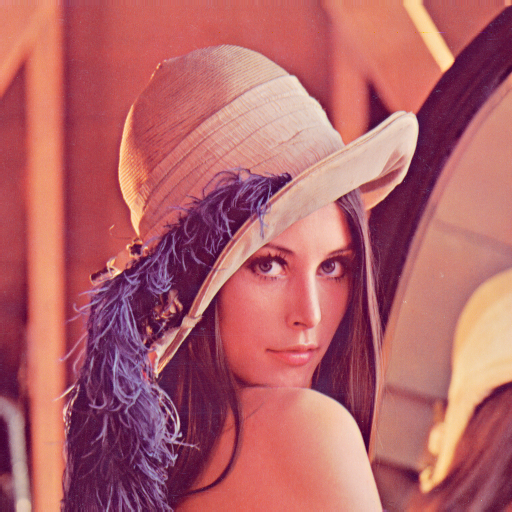

In [52]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/Lena_Image.png')
cv2_imshow(image)

# 3. Extraction of Image size

In [53]:
import cv2
from google.colab.patches import cv2_imshow
height, width, channels = image.shape
print(f"Image Dimensions: Width={width}, Height={height}, Channels={channels}")

Image Dimensions: Width=512, Height=512, Channels=3


# 4. Calculation image pixels

In [54]:
total_pixels = height * width * channels
print(f"Total number of pixels: {total_pixels}")

Total number of pixels: 786432


# 5. Convert RGB to Grayscale image

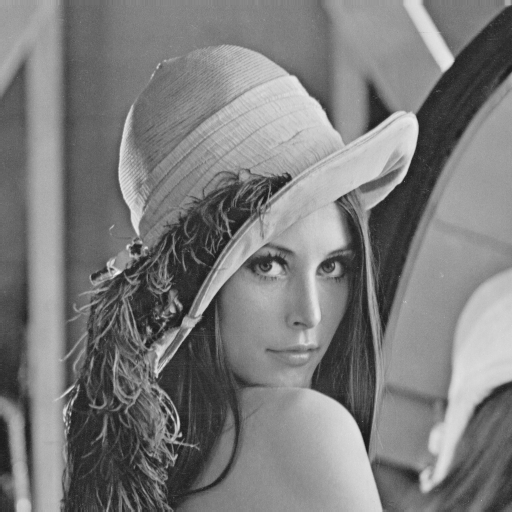

Grayscale Image Dimensions: (512, 512)


In [55]:
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale_image)
print(f"Grayscale Image Dimensions: {grayscale_image.shape}")

# Convert RGB to Grayscale image and Binary image by using a threshold.
# i. Also, Count the area of black pixels and size of image

Binary Image:


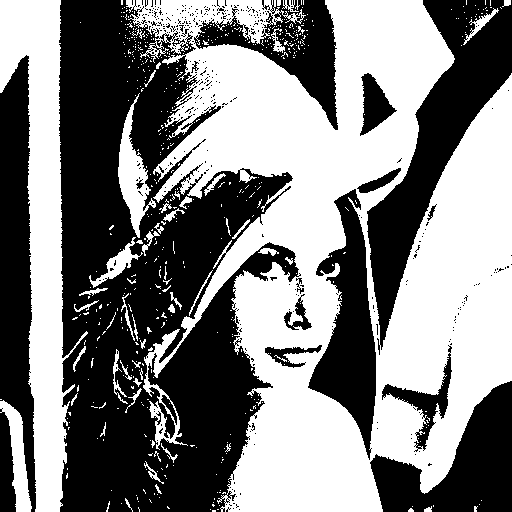

Black Pixel Area: 130547
Image Size (Total Pixels): 262144


In [56]:
import numpy as np
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
threshold_value = 128
_, binary_image = cv2.threshold(grayscale_image, threshold_value, 255, cv2.THRESH_BINARY)
print("Binary Image:")
cv2_imshow(binary_image)
black_pixel_area = np.sum(binary_image == 0)
image_size = binary_image.size

print("Black Pixel Area:", black_pixel_area)
print("Image Size (Total Pixels):", image_size)

# Task-2:- In this task we will understand and manipulate the properties of an image.
# 1. Perform edge detection on an image using the following operators
# i. Sobel Operator

Sobel X:


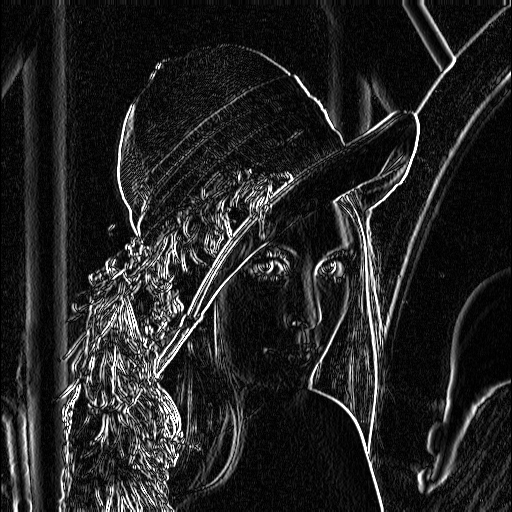

Sobel Y:


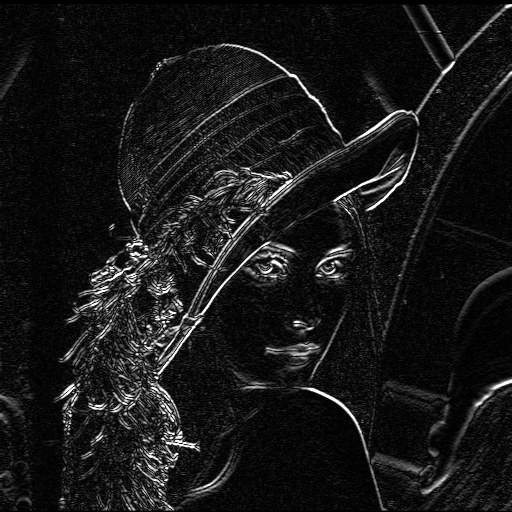

Combined Sobel Edge Detection:


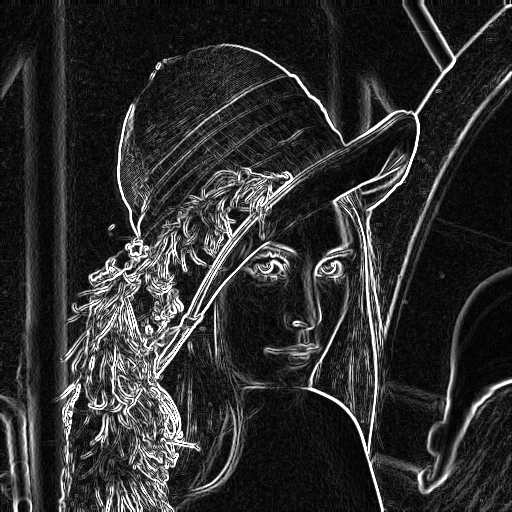

In [57]:
sobel_x = cv2.Sobel(grayscale_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(grayscale_image, cv2.CV_64F, 0, 1, ksize=3)


sobel_combined = cv2.magnitude(sobel_x, sobel_y)

sobel_combined = cv2.convertScaleAbs(sobel_combined)

print("Sobel X:")
cv2_imshow(cv2.convertScaleAbs(sobel_x))

print("Sobel Y:")
cv2_imshow(cv2.convertScaleAbs(sobel_y))

print("Combined Sobel Edge Detection:")
cv2_imshow(sobel_combined)

# ii. Prewitt Operator

Prewitt X Edge Detection:


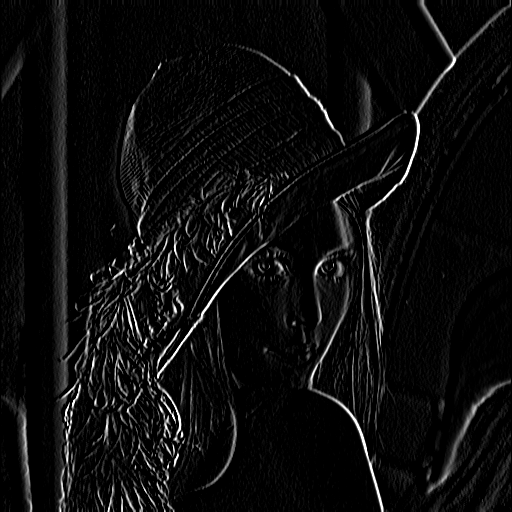

Prewitt Y Edge Detection:


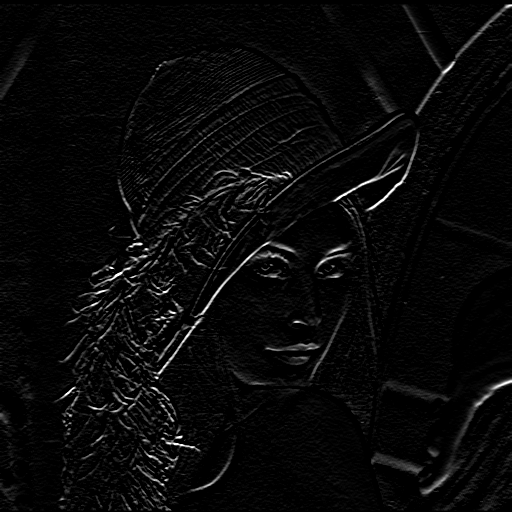

Combined Prewitt Edge Detection:


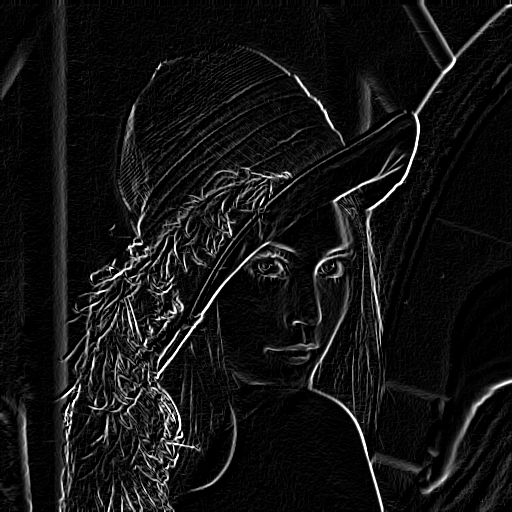

In [58]:

prewitt_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

edge_x = cv2.filter2D(grayscale_image, -1, prewitt_x)
edge_y = cv2.filter2D(grayscale_image, -1, prewitt_y)


prewitt_combined = cv2.magnitude(edge_x.astype(float), edge_y.astype(float))
prewitt_combined = cv2.convertScaleAbs(prewitt_combined)

print("Prewitt X Edge Detection:")
cv2_imshow(edge_x)

print("Prewitt Y Edge Detection:")
cv2_imshow(edge_y)

print("Combined Prewitt Edge Detection:")
cv2_imshow(prewitt_combined)

# iii. Roberts Cross Operator

Roberts Cross X Edge Detection:


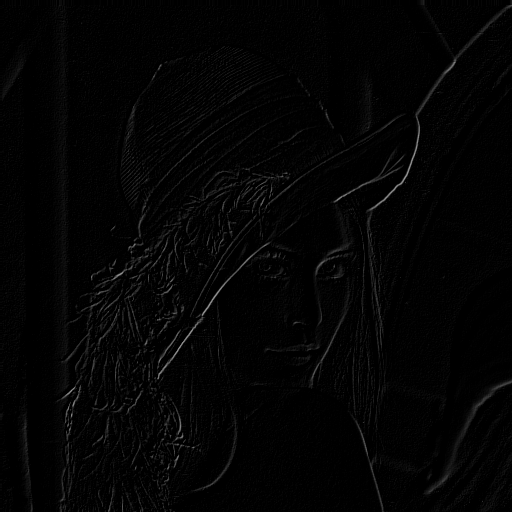

Roberts Cross Y Edge Detection:


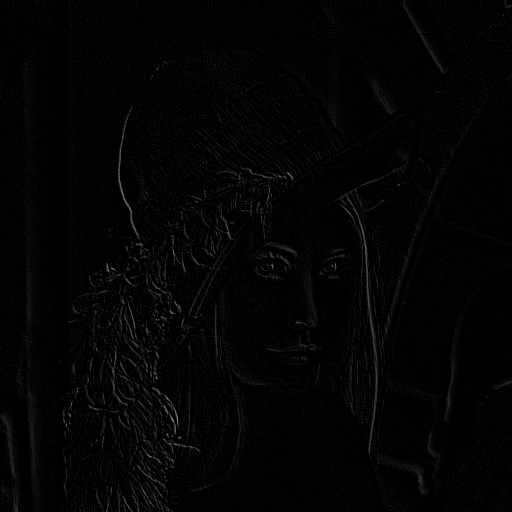

Combined Roberts Cross Edge Detection:


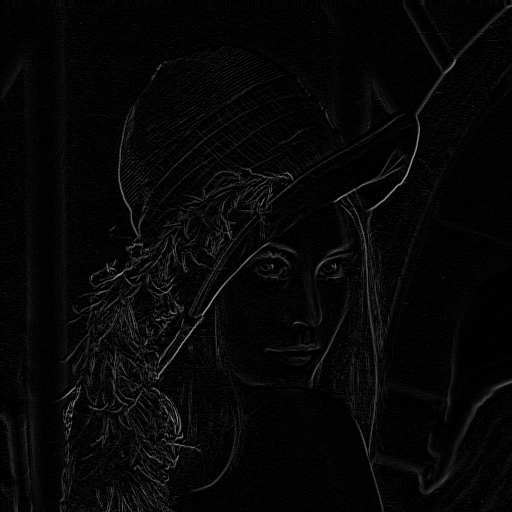

In [59]:
roberts_cross_x = np.array([[1, 0], [0, -1]])
roberts_cross_y = np.array([[0, 1], [-1, 0]])

edge_x = cv2.filter2D(grayscale_image, -1, roberts_cross_x)
edge_y = cv2.filter2D(grayscale_image, -1, roberts_cross_y)

roberts_combined = cv2.magnitude(edge_x.astype(float), edge_y.astype(float))
roberts_combined = cv2.convertScaleAbs(roberts_combined)

print("Roberts Cross X Edge Detection:")
cv2_imshow(edge_x)

print("Roberts Cross Y Edge Detection:")
cv2_imshow(edge_y)

print("Combined Roberts Cross Edge Detection:")
cv2_imshow(roberts_combined)

# iv. Canny Edge Detector

Canny Edge Detection:


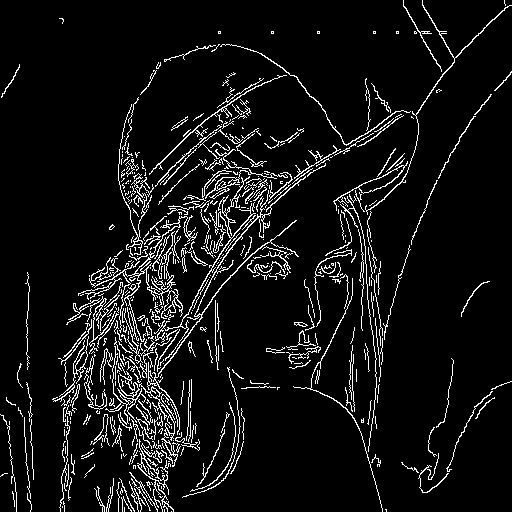

Sobel X Edge Detection:


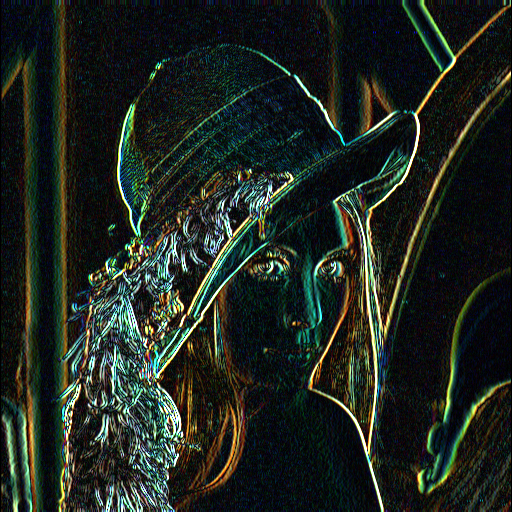

Sobel Y Edge Detection:


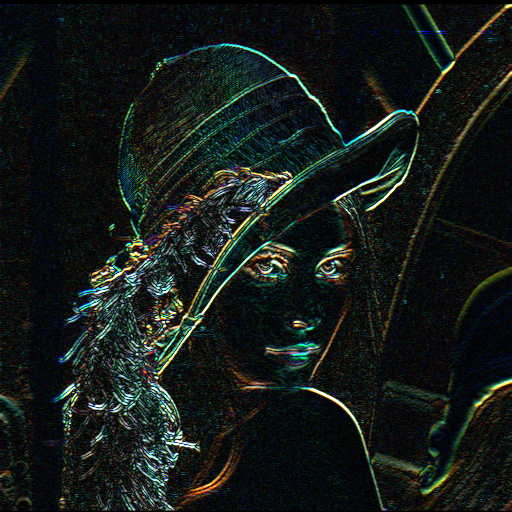

Combined Sobel Edge Detection (Magnitude):


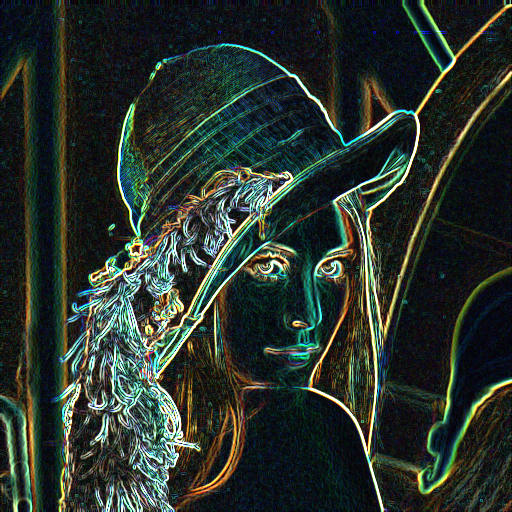

In [60]:

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

edges_combined = cv2.magnitude(sobel_x, sobel_y)
edges_combined = cv2.convertScaleAbs(edges_combined)

edges_canny = cv2.Canny(image, 100, 200)

print("Canny Edge Detection:")
cv2_imshow(edges_canny)

print("Sobel X Edge Detection:")
cv2_imshow(cv2.convertScaleAbs(sobel_x))

print("Sobel Y Edge Detection:")
cv2_imshow(cv2.convertScaleAbs(sobel_y))

print("Combined Sobel Edge Detection (Magnitude):")
cv2_imshow(edges_combined)

# 2. Perform image segmentation on an image using the following techniques
# i. Global Thresholding for Image Segmentation

Global Thresholding - Sobel X Segmentation:


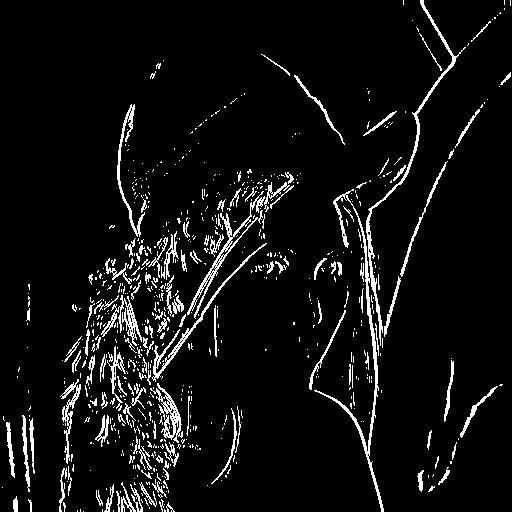

Global Thresholding - Sobel Y Segmentation:


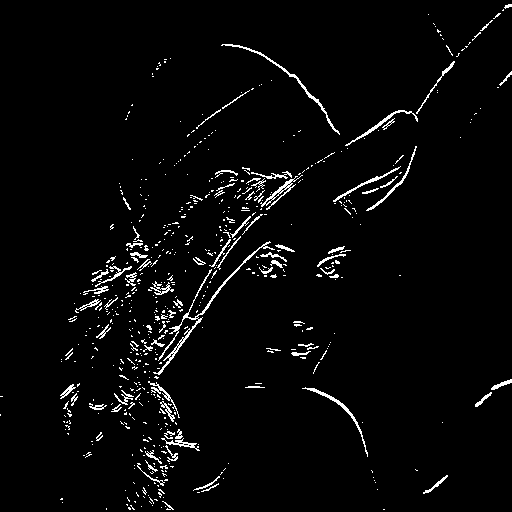

Global Thresholding - Combined Sobel Segmentation:


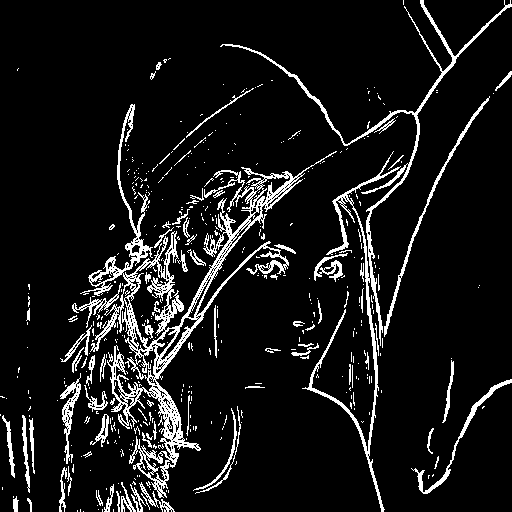

In [61]:
sobel_x = cv2.Sobel(grayscale_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(grayscale_image, cv2.CV_64F, 0, 1, ksize=3)

sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = cv2.convertScaleAbs(sobel_combined)

_, segmented_x = cv2.threshold(cv2.convertScaleAbs(sobel_x), 127, 255, cv2.THRESH_BINARY)
_, segmented_y = cv2.threshold(cv2.convertScaleAbs(sobel_y), 127, 255, cv2.THRESH_BINARY)
_, segmented_combined = cv2.threshold(sobel_combined, 127, 255, cv2.THRESH_BINARY)

print("Global Thresholding - Sobel X Segmentation:")
cv2_imshow(segmented_x)

print("Global Thresholding - Sobel Y Segmentation:")
cv2_imshow(segmented_y)

print("Global Thresholding - Combined Sobel Segmentation:")
cv2_imshow(segmented_combined)

# ii. Adaptive Thresholding

Adaptive Thresholding - Sobel X Segmentation:


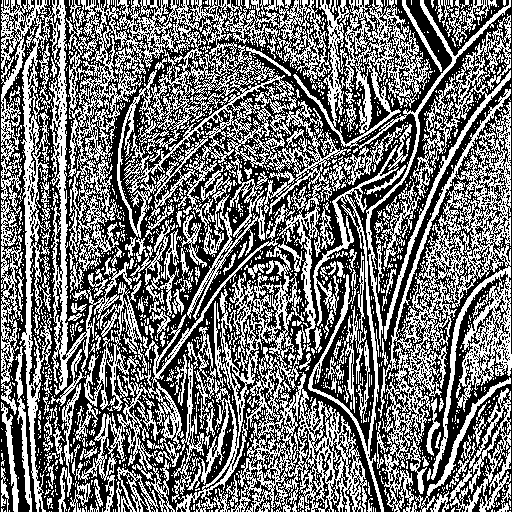

Adaptive Thresholding - Sobel Y Segmentation:


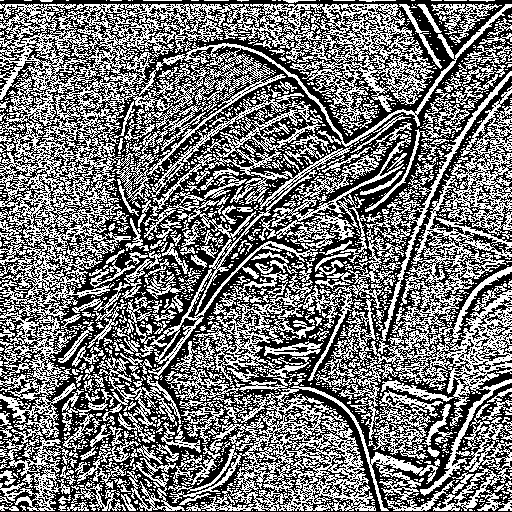

Adaptive Thresholding - Combined Sobel Segmentation:


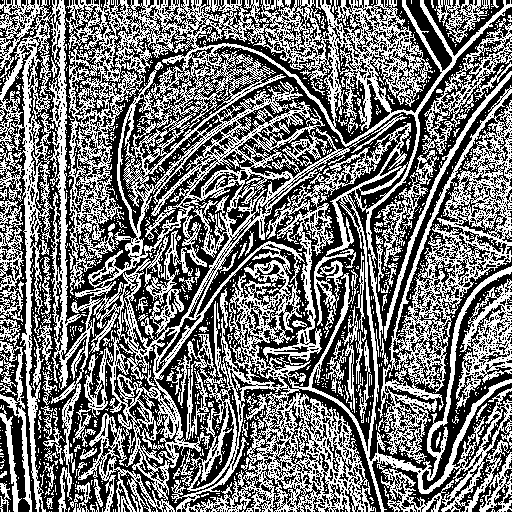

In [62]:
sobel_x = cv2.Sobel(grayscale_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(grayscale_image, cv2.CV_64F, 0, 1, ksize=3)

sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = cv2.convertScaleAbs(sobel_combined)

adaptive_x = cv2.adaptiveThreshold(cv2.convertScaleAbs(sobel_x), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
adaptive_y = cv2.adaptiveThreshold(cv2.convertScaleAbs(sobel_y), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
adaptive_combined = cv2.adaptiveThreshold(sobel_combined, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

print("Adaptive Thresholding - Sobel X Segmentation:")
cv2_imshow(adaptive_x)

print("Adaptive Thresholding - Sobel Y Segmentation:")
cv2_imshow(adaptive_y)

print("Adaptive Thresholding - Combined Sobel Segmentation:")
cv2_imshow(adaptive_combined)

# iii. Edge Detection for Segmentation (Canny Edge Detection)

Canny Edge Detection - Sobel X Segmentation:


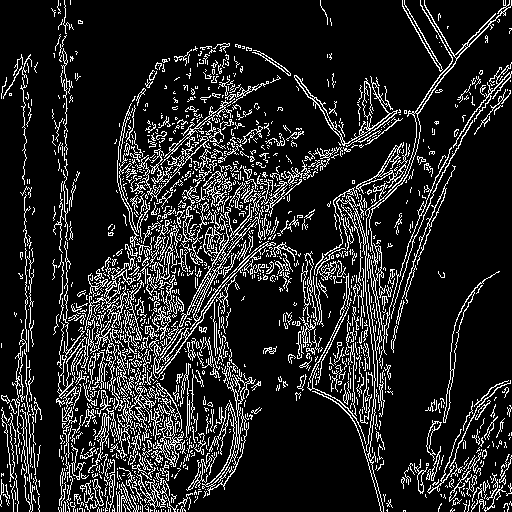

Canny Edge Detection - Sobel Y Segmentation:


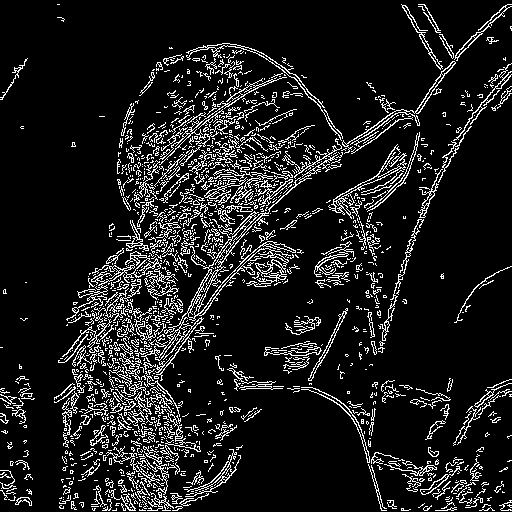

Canny Edge Detection - Combined Sobel Segmentation:


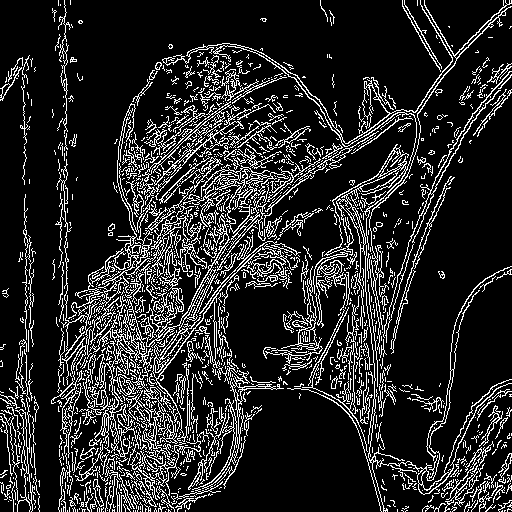

In [63]:
sobel_x = cv2.Sobel(grayscale_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(grayscale_image, cv2.CV_64F, 0, 1, ksize=3)

sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = cv2.convertScaleAbs(sobel_combined)

edges_x = cv2.Canny(cv2.convertScaleAbs(sobel_x), 100, 200)
edges_y = cv2.Canny(cv2.convertScaleAbs(sobel_y), 100, 200)
edges_combined = cv2.Canny(sobel_combined, 100, 200)

print("Canny Edge Detection - Sobel X Segmentation:")
cv2_imshow(edges_x)

print("Canny Edge Detection - Sobel Y Segmentation:")
cv2_imshow(edges_y)

print("Canny Edge Detection - Combined Sobel Segmentation:")
cv2_imshow(edges_combined)

# iv. Region-Based Segmentation (Watershed Algorithm)

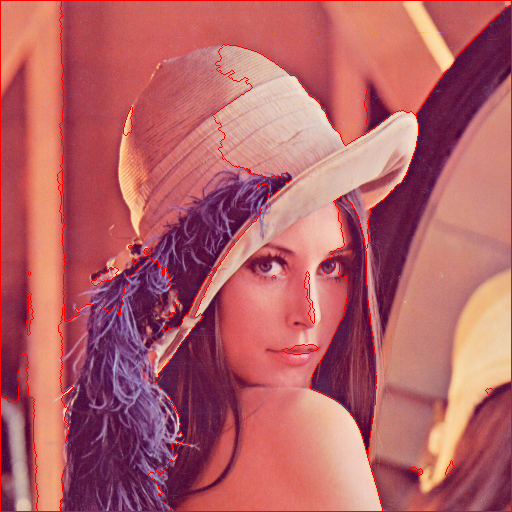

In [64]:
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = grayscale_image

sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = cv2.convertScaleAbs(sobel_combined)

_, thresh = cv2.threshold(sobel_combined, 50, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((3, 3), np.uint8)
sure_bg = cv2.dilate(thresh, kernel, iterations=3)

dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

_, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1
markers[unknown == 255] = 0

cv2.watershed(image, markers)

image[markers == -1] = [0, 0, 255]

cv2_imshow(image)
